### Import Required Libraries

In [1]:
import pandas as pd
import random 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.offline as py
py.init_notebook_mode(connected=True)
from matplotlib_venn import venn2, venn3
from matplotlib import gridspec
from plotly import tools
from sklearn.preprocessing import StandardScaler
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.model_selection import learning_curve
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.decomposition import PCA
from sklearn.metrics import make_scorer, r2_score, mean_squared_error, auc, mean_absolute_error
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.linear_model import (LinearRegression, Ridge, Lasso)
from sklearn.model_selection import cross_val_score

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

### Creating Dataframe

In [2]:

Salaries = pd.read_csv("multipleChoiceResponses.csv", low_memory = False)

###  Drop missing rows in target variable

In [20]:
Salaries.dropna(subset=['Q9'],inplace=True) 

In [21]:
Salaries.Q9.unique() 

array(['What is your current yearly compensation (approximate $USD)?',
       '10-20,000', '0-10,000',
       'I do not wish to disclose my approximate yearly compensation',
       '20-30,000', '125-150,000', '30-40,000', '50-60,000',
       '100-125,000', '90-100,000', '70-80,000', '80-90,000', '60-70,000',
       '400-500,000', '40-50,000', '150-200,000', '500,000+',
       '300-400,000', '200-250,000', '250-300,000'], dtype=object)

###  Remove rows where salary is not disclosed

In [22]:
Salaries = Salaries[Salaries['Q9']!= "I do not wish to disclose my approximate yearly compensation"]

### Add Index Column

In [23]:
Salaries.loc[1:,'index'] = Salaries[1:].reset_index().index

### Exported to new file

In [24]:
Salaries.to_csv("Kaggle_Salary_clean.csv")
Salaries_refined = pd.read_csv("Kaggle_Salary_clean.csv", low_memory = False)

# Data Cleaning

##  1. Drop unwanted columns
*Observing the dataframe i found that the columns with TEXT, None, other in them does not add any value to the analysis, hence decided to drop them*
   

In [25]:
Salaries_refined.iloc[0].head()

Unnamed: 0                                                                             0
Time from Start to Finish (seconds)                                Duration (in seconds)
Q1                                                What is your gender? - Selected Choice
Q1_OTHER_TEXT                          What is your gender? - Prefer to self-describe...
Q2                                                           What is your age (# years)?
Name: 0, dtype: object

###  1.1 Drop Columns with columns containing TEXT in it


In [26]:
#filtering out those columns which has 'TEXT' in it
cols_to_drop=list(filter(lambda x: 'TEXT' in x, list(Salaries_refined.columns))) 
len(cols_to_drop)

34

###  1.2 Drop Columns with columns containing None and other in question descriptions

In [27]:
#filtering out those columns which has 'OTHER', 'other', 'NONE', 'none', 'Other', 'None' in question descriptions
keywords = ['OTHER', 'other', 'NONE', 'none', 'Other', 'None']
Salaries_new=list(Salaries_refined.iloc[0])
for col in range(len(Salaries_new)):
    for search_word in keywords:
        if search_word in str(Salaries_new[col]):
            cols_to_drop.append(Salaries_refined.columns[col])
len(cols_to_drop)

103

### 1.3 Note that the unique number of values in cols_to_drop is 74

In [28]:
len(set(cols_to_drop))

74

### 1.4 Drop the list of columns from dataframe

In [29]:
Salaries_refined_1=Salaries_refined.drop(columns=cols_to_drop)

### 1.5 Note that the total number of columns have reduced to 323

In [30]:
Salaries_refined_1.columns

Index(['Unnamed: 0', 'Time from Start to Finish (seconds)', 'Q1', 'Q2', 'Q3',
       'Q4', 'Q5', 'Q6', 'Q7', 'Q8',
       ...
       'Q49_Part_6', 'Q49_Part_7', 'Q49_Part_8', 'Q49_Part_9', 'Q49_Part_10',
       'Q50_Part_1', 'Q50_Part_2', 'Q50_Part_3', 'Q50_Part_5', 'index'],
      dtype='object', length=323)

In [31]:
Salaries_refined_1.shape

(15430, 323)

### 1.6 Exported to new file - Salaries_Refined_1

In [32]:
Salaries_refined_1.to_csv("Salaries_Refined_1.csv")

## 2.  On Analysing Salaries_Refined_1, there' scope for many more columns that can be dropped 

### 2.1 Make a list of all the columns that needs to be dropped

In [33]:
cols_to_drop_1 = ['Unnamed: 0','Time from Start to Finish (seconds)','Q15_Part_6','Q26','Q39_Part_1','Q39_Part_2',
                  'Q40','Q41_Part_1','Q41_Part_2','Q41_Part_3','Q42_Part_1','Q42_Part_2','Q42_Part_3','Q42_Part_4',
                  'Q44_Part_1','Q44_Part_2','Q44_Part_3','Q44_Part_4','Q44_Part_5','Q44_Part_6','Q45_Part_1',
                  'Q45_Part_2','Q45_Part_3','Q45_Part_4','Q45_Part_5','Q45_Part_6','Q47_Part_1','Q47_Part_2',
                  'Q47_Part_3','Q47_Part_4','Q47_Part_5','Q47_Part_6','Q47_Part_7','Q47_Part_8','Q47_Part_9',
                  'Q47_Part_10','Q47_Part_11','Q47_Part_12','Q47_Part_13','Q49_Part_1','Q49_Part_2','Q49_Part_3',
                  'Q49_Part_4','Q49_Part_5','Q49_Part_6','Q49_Part_7','Q49_Part_8','Q49_Part_9','Q49_Part_10',
                  'Q50_Part_1','Q50_Part_2','Q50_Part_3','Q50_Part_5']

### 2.2 Drop the columns in cols_to_drop_1 list

In [34]:
Salaries_refined_2=Salaries_refined_1.drop(columns=cols_to_drop_1)

### 2.3 Note that the number of columns has now reduced to 270

In [35]:
len(Salaries_refined_2.columns)

270

## 3. Lets now analyse how many null values in each column in order to analyse the significance of columns

### 3.1 Analyze which columns which has less than 200 non-null values

In [36]:
drop=[]
for i in range(len(Salaries_refined_2.columns)):
    if Salaries_refined_2[Salaries_refined_2.columns[i]].isnull().sum() >= 14800: 
        drop.append(Salaries_refined_2.columns[i])

### 3.2 There are 115 such columns with less than 200 non-null values

In [37]:
len(drop)

115

### 3.3 Drop those respective columns

In [38]:
Salaries_refined_3=Salaries_refined_2.drop(columns=drop)
Salaries_refined_3_untouched=Salaries_refined_2.drop(columns=drop)

### 3.4 We now have 155 columns into consideration

In [39]:
Salaries_refined_3.shape

(15430, 155)

### 3.5 Exported to new file

In [40]:
Salaries_refined_3.to_csv("Salaries_Refined_3.csv")

## 4.0  Handling Missing Values

### 4.1 Q8 Column : How many years of experience do you have in your current role? Check if this column has appropriate values because in csv file it shows up as date

In [41]:

Salaries_refined_3.head()

Q1                           Q2  \
0  What is your gender? - Selected Choice  What is your age (# years)?   
1                                    Male                        30-34   
2                                  Female                        30-34   
3                                    Male                        22-24   
4                                    Male                        35-39   

                                          Q3  \
0  In which country do you currently reside?   
1                                  Indonesia   
2                   United States of America   
3                                      India   
4                                      Chile   

                                                  Q4  \
0  What is the highest level of formal education ...   
1                                  Bachelor’s degree   
2                                    Master’s degree   
3                                    Master’s degree   
4                                    Doctoral degree   

                                                  Q5  \
0  Which best describes your undergraduate major?...   
1                 Engineering (non-computer focused)   
2      Computer science (software engineering, etc.)   
3                          Mathematics or statistics   
4  Information technology, networking, or system ...   

                                                  Q6  \
0  Select the title most similar to your current ...   
1                                              Other   
2                                     Data Scientist   
3                                       Data Analyst   
4                                              Other   

                                                  Q7  \
0  In what industry is your current employer/cont...   
1                          Manufacturing/Fabrication   
2                                     I am a student   
3                                     I am a student   
4                                Academics/Education   

                                                  Q8  \
0  How many years of experience do you have in yo...   
1                                               5-10   
2                                                0-1   
3                                                0-1   
4                                              10-15   

                                                  Q9  \
0  What is your current yearly compensation (appr...   
1                                          10-20,000   
2                                           0-10,000   
3                                           0-10,000   
4                                          10-20,000   

                                                 Q10  ...  \
0  Does your current employer incorporate machine...  ...   
1                      No (we do not use ML methods)  ...   
2                                      I do not know  ...   
3                                      I do not know  ...   
4                      No (we do not use ML methods)  ...   

                                         Q38_Part_10  \
0  Who/what are your favorite media sources that ...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                         Q38_Part_11  \
0  Who/what are your favorite media sources that ...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                         Q38_Part_12  \
0  Who/what are your favorite media sources that ...   
1                                                NaN   
2                                                NaN   
3                 

### 4.2 It's confirmed that the data for this column is the right format

### 4.3 Let's Analyse how many Nan values in each column of Salaries_refined_3

In [42]:
# this loop will print number of NaNs in each selected columns 
for col in Salaries_refined_3.columns:
    print('Nulls','in',col,'(',Salaries_refined_3[col].iloc[0],')''=', Salaries_refined_3[col].isnull().sum())
    print('***********************************')

Nulls in Q1 ( What is your gender? - Selected Choice )= 0
***********************************
Nulls in Q2 ( What is your age (# years)? )= 0
***********************************
Nulls in Q3 ( In which country do you currently reside? )= 0
***********************************
Nulls in Q4 ( What is the highest level of formal education that you have attained or plan to attain within the next 2 years? )= 0
***********************************
Nulls in Q5 ( Which best describes your undergraduate major? - Selected Choice )= 135
***********************************
Nulls in Q6 ( Select the title most similar to your current role (or most recent title if retired): - Selected Choice )= 0
***********************************
Nulls in Q7 ( In what industry is your current employer/contract (or your most recent employer if retired)? - Selected Choice )= 0
***********************************
Nulls in Q8 ( How many years of experience do you have in your current role? )= 76
****************************

Nulls in Q21_Part_2 ( What data visualization libraries or tools have you used in the past 5 years? (Select all that apply) - Selected Choice - Matplotlib )= 5668
***********************************
Nulls in Q21_Part_4 ( What data visualization libraries or tools have you used in the past 5 years? (Select all that apply) - Selected Choice - Shiny )= 13274
***********************************
Nulls in Q21_Part_5 ( What data visualization libraries or tools have you used in the past 5 years? (Select all that apply) - Selected Choice - D3 )= 13630
***********************************
Nulls in Q21_Part_6 ( What data visualization libraries or tools have you used in the past 5 years? (Select all that apply) - Selected Choice - Plotly )= 11101
***********************************
Nulls in Q21_Part_7 ( What data visualization libraries or tools have you used in the past 5 years? (Select all that apply) - Selected Choice - Bokeh )= 13891
***********************************
Nulls in Q21_Part_8 ( W

Nulls in Q38_Part_12 ( Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Journal Publications )= 13819
***********************************
Nulls in Q38_Part_14 ( Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - KDnuggets Blog )= 13092
***********************************
Nulls in Q38_Part_15 ( Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - O'Reilly Data Newsletter )= 14258
***********************************
Nulls in Q38_Part_18 ( Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Medium Blog Posts )= 11590
***********************************
Nulls in Q43 ( Approximately what percent of your data projects involved exploring unfair bias in the dataset and/or algorithm? )= 5575
*****************************

### 4.4 From the above result I understand that there are two kind of columns :
    ### 'Multiple choice question kind' with each choice represented in each column 
    ### 'Dropdown kind' with all options captured in one column itself

### 4.5 Focusing on dropdown kind columns 

In [43]:
dropdown_columns=['Q5','Q8','Q10','Q12_MULTIPLE_CHOICE','Q17','Q18','Q20','Q22','Q23','Q24','Q25','Q32','Q37','Q43','Q46','Q48']

In [44]:
dropdown_columns

['Q5',
 'Q8',
 'Q10',
 'Q12_MULTIPLE_CHOICE',
 'Q17',
 'Q18',
 'Q20',
 'Q22',
 'Q23',
 'Q24',
 'Q25',
 'Q32',
 'Q37',
 'Q43',
 'Q46',
 'Q48']

### 4.5 Lets go through each column in the dropdown_columns list and see how we should fill in the Nan values

### 4.6 Analysing Q5 :  Which best describes your undergraduate major? 

### 4.7 Number of unique values in Q5

In [45]:
print('Nulls','in','Q5','(',Salaries_refined_3.Q5.iloc[0],')''=', Salaries_refined_3.Q5.isnull().sum())
Salaries_refined_3.Q5.value_counts(dropna=False)

Nulls in Q5 ( Which best describes your undergraduate major? - Selected Choice )= 135


Computer science (software engineering, etc.)                       5937
Engineering (non-computer focused)                                  2469
Mathematics or statistics                                           2074
A business discipline (accounting, economics, finance, etc.)        1290
Physics or astronomy                                                 843
Information technology, networking, or system administration         642
Medical or life sciences (biology, chemistry, medicine, etc.)        615
Other                                                                499
Social sciences (anthropology, psychology, sociology, etc.)          413
Humanities (history, literature, philosophy, etc.)                   210
Environmental science or geology                                     175
NaN                                                                  135
I never declared a major                                              68
Fine arts or performing arts                       

### 4.8 I see that Q5 is null for all 135 rows of Q4 : What is the highest level of formal education that you have attained or plan to attain within the next 2 years? = 'No formal education past high school'. Hence I change null values of Q5 to 'No formal education past high school'

In [46]:
Salaries_refined_3.Q5.fillna(value='No formal education past high school',inplace=True)

### 4.9 Analysing Q8:How many years of experience do you have in your current role?

In [47]:
print('Nulls','in','Q8','(',Salaries_refined_3.Q8.iloc[0],')''=', Salaries_refined_3.Q8.isnull().sum())
Salaries_refined_3.Q8.value_counts(dropna=False)

Nulls in Q8 ( How many years of experience do you have in your current role? )= 76


0-1                                                               3879
1-2                                                               2826
5-10                                                              1973
2-3                                                               1965
3-4                                                               1308
4-5                                                               1145
10-15                                                             1123
15-20                                                              595
20-25                                                              271
30 +                                                               144
25-30                                                              124
NaN                                                                 76
How many years of experience do you have in your current role?       1
Name: Q8, dtype: int64

### 4.10 Replace the 75 Nan values by 0-1 as most of them are students 

In [48]:
Salaries_refined_3.Q8.fillna(value='0-1',inplace=True)

### 4.11 Analysing Q10: Does your current employer incorporate machine learning methods into their business?

In [49]:
print('Nulls','in','Q10','(',Salaries_refined_3.Q10.iloc[0],')''=', Salaries_refined_3.Q10.isnull().sum())
Salaries_refined_3.Q10.value_counts(dropna=False)

Nulls in Q10 ( Does your current employer incorporate machine learning methods into their business? )= 292


We are exploring ML methods (and may one day put a model into production)                    3465
No (we do not use ML methods)                                                                3385
We recently started using ML methods (i.e., models in production for less than 2 years)      3006
We have well established ML methods (i.e., models in production for more than 2 years)       2255
We use ML methods for generating insights (but do not put working models into production)    1638
I do not know                                                                                1388
NaN                                                                                           292
Does your current employer incorporate machine learning methods into their business?            1
Name: Q10, dtype: int64

### 4.12 There are 292 Null values in this column. On close observation, I realise that for all these Null value rows, there's no data in any column post Q10 . So I decided to drop all those rows with Null value as it proves to be insignificant

In [50]:
#Find index of rows whose value in Q10 is null
row_drop=list(Salaries_refined_3[Salaries_refined_3.Q10.isnull()].index)
row_drop

[1695,
 1723,
 2150,
 3678,
 10650,
 10664,
 10669,
 10677,
 10678,
 10680,
 10687,
 10785,
 10798,
 10824,
 10845,
 10860,
 10880,
 10902,
 10925,
 10945,
 10950,
 10956,
 10974,
 11001,
 11018,
 11035,
 11058,
 11073,
 11139,
 11161,
 11164,
 11172,
 11195,
 11205,
 11210,
 11211,
 11225,
 11235,
 11261,
 11262,
 11270,
 11276,
 11284,
 11285,
 11369,
 11392,
 11405,
 11417,
 11428,
 11466,
 11474,
 11494,
 11521,
 11536,
 11552,
 11563,
 11570,
 11585,
 11594,
 11596,
 11602,
 11603,
 11623,
 11653,
 11713,
 11725,
 11738,
 11752,
 11756,
 11757,
 11762,
 11768,
 11777,
 11788,
 11795,
 11846,
 11907,
 11912,
 11944,
 12006,
 12021,
 12057,
 12068,
 12118,
 12133,
 12162,
 12164,
 12177,
 12214,
 12217,
 12246,
 12271,
 12285,
 12332,
 12387,
 12389,
 12405,
 12434,
 12444,
 12454,
 12460,
 12487,
 12527,
 12538,
 12539,
 12541,
 12549,
 12575,
 12587,
 12597,
 12624,
 12626,
 12631,
 12654,
 12657,
 12668,
 12677,
 12719,
 12732,
 12743,
 12799,
 12862,
 12890,
 12935,
 12950,
 129

### 4.13 Drop the rows with null values

In [51]:
#Lets drop all these drops
Salaries_refined_3.drop(row_drop,axis=0,inplace=True)
Salaries_refined_3.reset_index(inplace=True,drop=True)

### 4.14 Analysing Q12: What is the primary tool that you use at work or school to analyze data? 

In [52]:
#Find index of rows whose value in Q12 is null
row_drop=list(Salaries_refined_3[Salaries_refined_3.Q12_MULTIPLE_CHOICE.isnull()].index)
len(row_drop)

1280

### 4.15 On close observation : For all the null value rows, there's no data in any column post Q12 . Hence I decided to drop these insignificant rows

In [53]:
#Lets drop all these rows
Salaries_refined_3.drop(row_drop,axis=0,inplace=True)
Salaries_refined_3.reset_index(inplace=True,drop=True)

In [54]:
Salaries_refined_3.shape

(13858, 155)

### 4.16 Analysing Q17 : What specific programming language do you use most often? 

In [55]:
#Find indices of missing values in Q32
row_NaN=list(Salaries_refined_3[Salaries_refined_3.Q17.isnull()].index)
len(row_NaN)

2769

### 4.17 It is observed that this column is null only for those who have chosen one programming language from the various options in Q16. So lets replace the NaN values in this column with that one choice selected by the user in Q16

In [40]:
cols_to_check = ['Q16_Part_1','Q16_Part_2','Q16_Part_3','Q16_Part_4','Q16_Part_5','Q16_Part_6','Q16_Part_7',
                 'Q16_Part_8','Q16_Part_9','Q16_Part_10','Q16_Part_13','Q16_Part_14','Q16_Part_16']
for row in row_NaN:
    for col in cols_to_check:
        if not pd.isna(Salaries_refined_3[col].iloc[row]):
            val= Salaries_refined_3[col].iloc[row] 
            Salaries_refined_3.Q17.iloc[row] = val

C:\Users\nileena\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



### 4.18 After this step, there are stil 667 rows with no values. This is because no choice has been chosen in any of the questions in Q16. So lets replace these values with None

In [56]:
Salaries_refined_3.Q17.value_counts(dropna=False)

Python                                                                         5866
NaN                                                                            2769
R                                                                              1526
SQL                                                                             999
Java                                                                            623
C/C++                                                                           464
C#/.NET                                                                         329
Javascript/Typescript                                                           308
MATLAB                                                                          247
SAS/STATA                                                                       179
PHP                                                                             149
Visual Basic/VBA                                                            

### 4.19 Fill remaining values with 'None'

In [57]:
Salaries_refined_3.Q17.fillna(value='None',inplace=True)

### 4.20 Analysing Q18:What programming language would you recommend an aspiring data scientist to learn first? For the Nan values in this column , I realised that there's no data in other columns - hence drop those rows

In [58]:
#Find index of rows whose value in Q10 is null
row_drop=list(Salaries_refined_3[Salaries_refined_3.Q18.isnull()].index)


In [59]:
#Lets drop all these drops
Salaries_refined_3.drop(row_drop,axis=0,inplace=True)
Salaries_refined_3.reset_index(inplace=True,drop=True)

In [60]:
Salaries_refined_3.shape

(13608, 155)

### 4.21 Analysing Q20 : Of the choices that you selected in the previous question, which ML library have you used the most? It is observed that this column is null only for those rows who have chosen one ML library from the various options in Q19

In [61]:
#Find indices of missing values in Q20
row_NaN=list(Salaries_refined_3[Salaries_refined_3.Q20.isnull()].index)


### 4.22 So lets replace the NaN values in this column with that one choice selected by the user in Q19

In [47]:
cols_to_check = ['Q19_Part_1','Q19_Part_2','Q19_Part_3','Q19_Part_4','Q19_Part_5','Q19_Part_6',
                 'Q19_Part_7','Q19_Part_9','Q19_Part_10','Q19_Part_13','Q19_Part_14','Q19_Part_15','Q19_Part_17']
for row in row_NaN:
    for col in cols_to_check:
        if not pd.isna(Salaries_refined_3[col].iloc[row]):
            val= Salaries_refined_3[col].iloc[row] 
            Salaries_refined_3.Q20.iloc[row] = val



In [48]:
Salaries_refined_3.to_csv("Salaries_Refined_3_new.csv")

### 4.23 Even after this, there are around 2000 rows with no values. This is because no choice has been chosen in any of the questions in Q19. So lets replace these values with None

In [62]:
Salaries_refined_3.Q20.fillna(value='None',inplace=True)

### 4.24 Analysing Q22: Of the choices that you selected in the previous question, which specific data visualization library or tool have you used the most? 

In [63]:
Salaries_refined_3.Q22.value_counts(dropna=False)

Matplotlib                                                                                                                                                4915
NaN                                                                                                                                                       4421
ggplot2                                                                                                                                                   2267
Seaborn                                                                                                                                                    982
Plotly                                                                                                                                                     423
D3                                                                                                                                                         200
Shiny                                         

### 4.25 Note there are around 4000 Nan Values . Lets follow the same procedure as Q17/Q20

In [64]:
#Find indices of missing values in Q22
row_NaN=list(Salaries_refined_3[Salaries_refined_3.Q22.isnull()].index)
len(row_NaN)

4421

In [66]:
cols_to_check = ['Q21_Part_1','Q21_Part_2','Q21_Part_4','Q21_Part_5','Q21_Part_6',
                 'Q21_Part_7','Q21_Part_8','Q21_Part_10','Q21_Part_11']
for row in row_NaN:
    for col in cols_to_check:
        if not pd.isna(Salaries_refined_3[col].iloc[row]):
            val= Salaries_refined_3[col].iloc[row] 
            Salaries_refined_3.Q22.iloc[row] = val

In [67]:
Salaries_refined_3.Q22.value_counts(dropna=False)

Matplotlib                                                                                                                                                6825
ggplot2                                                                                                                                                   2863
NaN                                                                                                                                                       1575
Seaborn                                                                                                                                                   1054
Plotly                                                                                                                                                     491
D3                                                                                                                                                         315
Shiny                                         

### 4.26 There are still Nan values because of no choice selected in Q21

In [68]:
Salaries_refined_3.Q22.fillna(value='None',inplace=True)

### 4.27 Analysing Q23: Approximately what percent of your time at work or school is spent actively coding? For the Nan Values in this column, there's no data in the rest of columns . Hence dropping those rows

In [69]:
#Find index of rows whose value in Q23 is null
row_drop=list(Salaries_refined_3[Salaries_refined_3.Q23.isnull()].index)

In [70]:
#Lets drop all these drops
Salaries_refined_3.drop(row_drop,axis=0,inplace=True)
Salaries_refined_3.reset_index(inplace=True,drop=True)

In [71]:
Salaries_refined_3.shape

(13462, 155)

### 4.28 Analysing Q24:How long have you been writing code to analyze data? For the Nan Values in this column, there's no data in the rest of columns . Hence dropping those rows

In [72]:
#Find index of rows whose value in Q24 is null
row_drop=list(Salaries_refined_3[Salaries_refined_3.Q24.isnull()].index)

#Lets drop all these drops
Salaries_refined_3.drop(row_drop,axis=0,inplace=True)
Salaries_refined_3.reset_index(inplace=True,drop=True)

Salaries_refined_3.shape

(13442, 155)

### 4.29 Analysing Q25: For how many years have you used machine learning methods (at work or in school)?For the Nan Values in this column, there's no data in the rest of columns . Hence dropping those rows

In [73]:
#Find index of rows whose value in Q25 is null
row_drop=list(Salaries_refined_3[Salaries_refined_3.Q25.isnull()].index)

#Lets drop all these drops
Salaries_refined_3.drop(row_drop,axis=0,inplace=True)
Salaries_refined_3.reset_index(inplace=True,drop=True)

Salaries_refined_3.shape

(13416, 155)

### 4.30 Q32:What is the type of data that you currently interact with most often at work or school? 

In [60]:
#Find indices of missing values in Q32
row_NaN=list(Salaries_refined_3[Salaries_refined_3.Q32.isnull()].index)
len(row_NaN)


3111

### 4.31 Note there are around 3111 Nan Values . Lets follow the same procedure as Q17/Q20/Q22

In [61]:
cols_to_check = ['Q31_Part_1','Q31_Part_2','Q31_Part_3','Q31_Part_4','Q31_Part_5',
                 'Q31_Part_6','Q31_Part_7','Q31_Part_8','Q31_Part_9','Q31_Part_10','Q31_Part_11']
for row in row_NaN:
    for col in cols_to_check:
        if not pd.isna(Salaries_refined_3[col].iloc[row]):
            val= Salaries_refined_3[col].iloc[row] 
            Salaries_refined_3.Q32.iloc[row] = val

In [62]:
Salaries_refined_3.Q32.value_counts(dropna=False)

Numerical Data                                                                                               3061
Tabular Data                                                                                                 2409
Text Data                                                                                                    1930
Time Series Data                                                                                             1490
Image Data                                                                                                   1437
NaN                                                                                                          1099
Categorical Data                                                                                              804
Sensor Data                                                                                                   405
Geospatial Data                                                                         

### 4.31 Lets replace the remaining NaN Values with None

In [63]:
Salaries_refined_3.Q32.fillna(value='None',inplace=True)

### 4.32 Analysing Q37: On which online platform have you spent the most amount of time? It is similar to Q17/Q20/Q22/Q32 case

In [64]:
#Find indices of missing values in Q37
row_NaN=list(Salaries_refined_3[Salaries_refined_3.Q37.isnull()].index)
len(row_NaN)

6126

In [65]:
cols_to_check = ['Q36_Part_1','Q36_Part_2','Q36_Part_3','Q36_Part_4',
                 'Q36_Part_6','Q36_Part_7','Q36_Part_8','Q36_Part_9','Q36_Part_11']
for row in row_NaN:
    for col in cols_to_check:
        if not pd.isna(Salaries_refined_3[col].iloc[row]):
            val= Salaries_refined_3[col].iloc[row] 
            Salaries_refined_3.Q37.iloc[row] = val

In [66]:
Salaries_refined_3.Q37.value_counts(dropna=False)

Coursera                                                                              4090
NaN                                                                                   3501
Udemy                                                                                 1174
DataCamp                                                                              1174
Udacity                                                                                787
Kaggle Learn                                                                           769
edX                                                                                    676
Online University Courses                                                              520
Fast.AI                                                                                277
Other                                                                                  246
developers.google.com                                                                  108

### 4.33 The remaining NaN values are replaced by None

In [67]:
Salaries_refined_3.Q37.fillna(value='None',inplace=True)

### Lets see how our dataset looks like after all the above cleaning

In [68]:
Salaries_refined_3.shape

(13416, 155)

In [69]:
Salaries_refined_3.to_csv("Salaries_Refined_3_Cleaned.csv")

In [70]:
Salaries_refined_4=pd.DataFrame(Salaries_refined_3)
Salaries_refined_4.head()

Q1                           Q2  \
0  What is your gender? - Selected Choice  What is your age (# years)?   
1                                    Male                        30-34   
2                                  Female                        30-34   
3                                    Male                        22-24   
4                                    Male                        35-39   

                                          Q3  \
0  In which country do you currently reside?   
1                                  Indonesia   
2                   United States of America   
3                                      India   
4                                      Chile   

                                                  Q4  \
0  What is the highest level of formal education ...   
1                                  Bachelor’s degree   
2                                    Master’s degree   
3                                    Master’s degree   
4                                    Doctoral degree   

                                                  Q5  \
0  Which best describes your undergraduate major?...   
1                 Engineering (non-computer focused)   
2      Computer science (software engineering, etc.)   
3                          Mathematics or statistics   
4  Information technology, networking, or system ...   

                                                  Q6  \
0  Select the title most similar to your current ...   
1                                              Other   
2                                     Data Scientist   
3                                       Data Analyst   
4                                              Other   

                                                  Q7  \
0  In what industry is your current employer/cont...   
1                          Manufacturing/Fabrication   
2                                     I am a student   
3                                     I am a student   
4                                Academics/Education   

                                                  Q8  \
0  How many years of experience do you have in yo...   
1                                               5-10   
2                                                0-1   
3                                                0-1   
4                                              10-15   

                                                  Q9  \
0  What is your current yearly compensation (appr...   
1                                          10-20,000   
2                                           0-10,000   
3                                           0-10,000   
4                                          10-20,000   

                                                 Q10  ...  \
0  Does your current employer incorporate machine...  ...   
1                      No (we do not use ML methods)  ...   
2                                      I do not know  ...   
3                                      I do not know  ...   
4                      No (we do not use ML methods)  ...   

                                         Q38_Part_10  \
0  Who/what are your favorite media sources that ...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                         Q38_Part_11  \
0  Who/what are your favorite media sources that ...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                         Q38_Part_12  \
0  Who/what are your favorite media sources that ...   
1                                                NaN   
2                                                NaN   
3                 

### Rename our target column Q9 to Salary

In [71]:
Salaries_refined_4=Salaries_refined_4.rename(columns={"Q9":"Salary"})
Salaries_refined_4=Salaries_refined_4.drop(Salaries_refined_4.index[0])

### Note that Salary column are buckets. Lets map each of these buckets to its mean values

In [72]:

mapper = {'0-10,000':0,'10-20,000':1,'20-30,000':1,'30-40,000':2,'40-50,000':2,'50-60,000':3,
          '60-70,000':3,'70-80,000':3,'80-90,000':4,'90-100,000':4,'100-125,000':5,
          '125-150,000':5,'150-200,000':5,'200-250,000':6,'250-300,000':6,'300-400,000':6,
          '400-500,000':6,'500,000+':6}
            
Salaries_refined_4.Salary=Salaries_refined_4.Salary.map(mapper)

classes = ['less than 10k', 'between 10k and 30k', 'between 30k and 50k',\
           'between 50k and 80k', 'between 80k and 100k', 'between 100k and 200k','more than 200k']

In [73]:
Salaries_refined_4.Salary.value_counts()

0    3555
1    2892
3    2128
2    1861
5    1682
4     977
6     320
Name: Salary, dtype: int64

## 5. One Hot Encoding 

There are two main methods of encoding categorical data:

1. Integer Encoding
2. One Hot Encoding

In integer encoding each category in the data is given an incremental value therefore in the Gender category if the 'Others' are set as 0, then Male will be 1 and Female will be 2. Since 2 is a greater integer value than 1 or 0 this might lead to the machine learning algorithms falsely interpreting a Gender value of 2 corresponding to Female as having greater importance, which may skew our results.

To do away with this problem, One Hot Encoding is used in which each unique value in the categorical data is made into a column with binary value of 1 or 0. The column will have a value of 1 if it is contained in a row and the rest of the columns corresponding to that categorical data will have a value of 0.

Therefore, I have used One Hot Encoding for feature engineering of the categorical data.

### 5.1 Choose the columns from the cleaned dataframe on which one hot encoding needs to be performed

In [74]:
imp_cols = ['Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q12_MULTIPLE_CHOICE',
            'Q17','Q18','Q20','Q22','Q23','Q24','Q25','Q37']
Salaries_refined_5=Salaries_refined_3[imp_cols]

### 5.2 Let's rename these columns to meaningful names

In [75]:
Salaries_refined_5 = Salaries_refined_5.rename(columns={"Q1": "Gender","Q2": "Age","Q3": "Country of Residence",
                                                        "Q4": "Education Level","Q5": "Undergraduate Major",
                                                        "Q6": "Job Title","Q7":"Industry/Field",
                                                        "Q8": "Work experience",
                                                        "Q12_MULTIPLE_CHOICE": "Primary Tool",
                                                        "Q17": "Used Programming Language",
                                                        "Q18":"Recommended Programming Language",
                                                        "Q20": "ML Library",
                                                        "Q22": "Data Visualisation Library",
                                                        "Q23":"% of time spent on coding",
                                                        "Q24": "Years of experience of coding to analyze data?",
                                                        "Q25": "Years of experience with ML methods?",
                                                        "Q37": "Online platform - Selected Choice?"    
                                  })
Salaries_refined_5=Salaries_refined_5.drop(Salaries_refined_5.index[0])

In [76]:
selected_columns =['Gender','Age','Country of Residence','Education Level',
                   'Undergraduate Major','Job Title','Industry/Field',
                    'Work experience','Primary Tool','Used Programming Language','Recommended Programming Language',
                    'ML Library','Data Visualisation Library','% of time spent on coding',
                    'Years of experience of coding to analyze data?',
                    'Years of experience with ML methods?',
                    'Online platform - Selected Choice?']

In [77]:
Salaries_refined_5.head()

Gender    Age      Country of Residence    Education Level  \
1    Male  30-34                 Indonesia  Bachelor’s degree   
2  Female  30-34  United States of America    Master’s degree   
3    Male  22-24                     India    Master’s degree   
4    Male  35-39                     Chile    Doctoral degree   
5    Male  18-21                     India    Master’s degree   

                                 Undergraduate Major       Job Title  \
1                 Engineering (non-computer focused)           Other   
2      Computer science (software engineering, etc.)  Data Scientist   
3                          Mathematics or statistics    Data Analyst   
4  Information technology, networking, or system ...           Other   
5  Information technology, networking, or system ...           Other   

              Industry/Field Work experience  \
1  Manufacturing/Fabrication            5-10   
2             I am a student             0-1   
3             I am a student             0-1   
4        Academics/Education           10-15   
5                      Other             0-1   

                                        Primary Tool  \
1  Basic statistical software (Microsoft Excel, G...   
2  Local or hosted development environments (RStu...   
3    Advanced statistical software (SPSS, SAS, etc.)   
4  Basic statistical software (Microsoft Excel, G...   
5  Local or hosted development environments (RStu...   

  Used Programming Language Recommended Programming Language ML Library  \
1                       SQL                           Python       None   
2                      Java                           Python       None   
3                       SQL                                R       None   
4                         R                                R       None   
5                    Python                           Python      Keras   

  Data Visualisation Library % of time spent on coding  \
1                       None      1% to 25% of my time   
2                    ggplot2     75% to 99% of my time   
3                      Shiny     75% to 99% of my time   
4                       None     25% to 49% of my time   
5                 Matplotlib     75% to 99% of my time   

  Years of experience of coding to analyze data?  \
1  I have never written code but I want to learn   
2                                     5-10 years   
3                                     5-10 years   
4                                       < 1 year   
5                                       < 1 year   

                Years of experience with ML methods?  \
1  I have never studied machine learning but plan...   
2                                           < 1 year   
3                                          2-3 years   
4                                           < 1 year   
5                                           < 1 year   

  Online platform - Selected Choice?  
1                               None  
2                           DataCamp  
3                           Coursera  
4                           DataCamp  
5                            Udacity

### 5.3 Perform one hot encoding on these columns

In [78]:
one_hot = pd.get_dummies(Salaries_refined_5)

In [79]:
one_hot.head()

Gender_Female  Gender_Male  Gender_Prefer not to say  \
1              0            1                         0   
2              1            0                         0   
3              0            1                         0   
4              0            1                         0   
5              0            1                         0   

   Gender_Prefer to self-describe  Age_18-21  Age_22-24  Age_25-29  Age_30-34  \
1                               0          0          0          0          1   
2                               0          0          0          0          1   
3                               0          0          1          0          0   
4                               0          0          0          0          0   
5                               0          1          0          0          0   

   Age_35-39  Age_40-44  ...  Online platform - Selected Choice?_Fast.AI  \
1          0          0  ...                                           0   
2          0          0  ...                                           0   
3          0          0  ...                                           0   
4          1          0  ...                                           0   
5          0          0  ...                                           0   

   Online platform - Selected Choice?_Kaggle Learn  \
1                                                0   
2                                                0   
3                                                0   
4                                                0   
5                                                0   

   Online platform - Selected Choice?_None  \
1                                        1   
2                                        0   
3                                        0   
4                                        0   
5                                        0   

   Online platform - Selected Choice?_Online University Courses  \
1                                                  0              
2                                                  0              
3                                                  0              
4                                                  0              
5                                                  0              

   Online platform - Selected Choice?_Other  \
1                                         0   
2                                         0   
3                                         0   
4                                         0   
5                                         0   

   Online platform - Selected Choice?_TheSchool.AI  \
1                                                0   
2                                                0   
3                                                0   
4                                                0   
5                                                0   

   Online platform - Selected Choice?_Udacity  \
1                                           0   
2                                           0   
3                                           0   
4                                           0   
5                                           1   

   Online platform - Selected Choice?_Udemy  \
1                                         0   
2                                         0   
3                                         0   
4                                         0   
5                                         0   

   Online platform - Selected Choice?_developers.google.com  \
1                                                  0          
2                                                  0          
3                                                  0          
4                                                  0          
5                                                  0          

   Online platform - Selected Choice?_edX  
1                                       0  
2                                       0  
3 

In [80]:
one_hot.shape

(13415, 253)

### From the above step,we have 253 features

# 2. Exploratory Data Analysis

### 2.1 Undergraduate Major 

In [3]:
def Horizontal_bar_plot(df, column, name='',title='', limit=None , colorscale = 'rainbow',width = 900, height = 500):
    tmp = df[column].value_counts()[:limit]
    #tmp = tmp.sort_values()
    tmp_per = round(tmp * 100/ tmp.sum() , 2)
    tmp_per = [str(v)+' %' for v in tmp_per]
    # Plot
    trace1 = go.Bar(y = tmp.values, x = tmp.index, name=name,orientation='v',
        marker=dict(color=tmp.values, colorscale = colorscale, line=dict(color='rgb( 11, 180, 191)',width=2),),
        text = tmp_per, textposition='outside',
    )
    #Layout
    layout = dict(
        title=title,
        width = width,height = height,
        yaxis=dict(automargin=True,),
        paper_bgcolor='rgb(251, 252, 252)',
        plot_bgcolor='rgb(251, 252, 252)'
    )
    fig = {'data':[trace1], 'layout':layout}
    py.iplot(fig)

In [4]:
print(Salaries['Q5'][0])
title = 'Undergraduate Major'
Horizontal_bar_plot(Salaries, column= 'Q5', name='Year',title= title, height= 500)

Which best describes your undergraduate major? - Selected Choice


### Inference:

*1. Computer science under graduate dominated in the survey participants followed by engineering(non - computer focused).*

*2. The third and fourth position of undergraduate major is Math or Stats and A business disciple.*

*3. It is really interesting to see people from different majors such as Fine arts, Environmental science,
Social science, Humanities in kaggle community.*

### 2.2 Country of Residence

In [5]:
def Map(tmp, title = '', colorscale = 'Viridis',):
    """ Geo map:"""
    data =  dict( type = 'choropleth',
                locations = tmp.index,
                z = tmp.values,
                text = tmp.index,
                locationmode = 'country names',
                colorscale = colorscale,
                autocolorscale = False,
                reversescale = True,
                marker = dict( line = dict (
                        color = 'rgb(180,180,180)',width = 0.3
                    ) ),
                colorbar = dict( autotick = False,
                    title = 'Response'),
          ) 

    layout = dict(
        title = title,
        geo = dict(showland = True,
                   landcolor = "rgb(250, 250, 250)",
            showframe = False,
            showcoastlines = True,
            projection = dict( type = 'Mercator')
        ))

    fig = dict( data=[data], layout=layout )

    py.iplot( fig, validate=False, filename='world-map' )

In [6]:
print(Salaries['Q3'][0])
tmp = Salaries['Q3'].value_counts()
title = '2018 Kaggle Survey - Response'
Map(tmp, title = title, colorscale= 'Viridis')

In which country do you currently reside?


In [7]:
print(Salaries['Q3'][0])
Horizontal_bar_plot(Salaries, column= 'Q3',
                   title = 'Top 20 Countries Response', limit = 20)
Salaries['Q3'].nunique()

In which country do you currently reside?


59

### Inference:

*1. USA, India and China are among the top response obtained. Information technology is the most popular 
       among these countries and the population of these countries are much higher compared to other countries.*
       
*2. Canada accounts for about 3.5% of survey respondents*

### 2.3 Programming Language

In [8]:
print(Salaries['Q17'][0])
tmp = Salaries['Q17'].value_counts(ascending = True)
trace1 = go.Pie(labels= tmp.index, values= tmp.values, hoverinfo='label+percent+name', 
                    marker = dict(colors =['magma']), name = 'Programming Language',
                    hole= .5, domain= dict(x = [0, 0.38], ))
# Layout
layout = go.Layout(title = 'Programming language used often', width = 900, height = 500, 
                   annotations = [dict(font = dict(size=20)),
                                  dict(showarrow =False, text= 'Programming Language',x = 0.15, y=0.5),
                            ])
fig = go.Figure(data = [trace1], layout= layout)
py.iplot(fig)

What specific programming language do you use most often? - Selected Choice


#### Representing the same with wordcloud

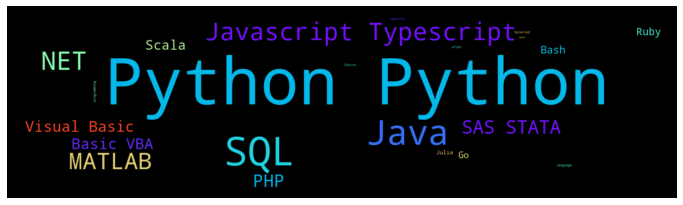

In [10]:
column_start = Salaries.Q17
wc = (WordCloud(height=400,width=1400, max_words=1000, stopwords=STOPWORDS,
                colormap='rainbow',background_color='black'
              ).generate(' '.join(column_start.dropna().astype(str))))

plt.figure(figsize=(12,8))
# plt.imshow(wc,interpolation='bilinear')
# plt.savefig('wc.png')
# plt.axis('off')
# plt.title('Activity');

plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

### Inference
        1. It is clear from the visual representations that Python is the most used programming language 
           with more than 50% of survey respondents using it.(53%)
        2. R, SQL, Java are the next popular ones accounting to about 14%, 9% and 6% respectively.

### 2.4 Current Job Role

In [9]:
print(Salaries['Q6'][0])
title = 'Current Role'
Horizontal_bar_plot(Salaries, column = 'Q6', title = title, colorscale= 'Rainbow')

Select the title most similar to your current role (or most recent title if retired): - Selected Choice


### Inference:

*1. Among the survey respondents, we find more of Data scientists(21%) and students(17%).*

*2. About 15% of respondents are software engineers willing to build their career in data science domain.
   So they are building their portfolio by participating in different kaggle competition and kernel.*

*3. About 9% of respondents are currently working as Data analyst.*


### 2.4 Age

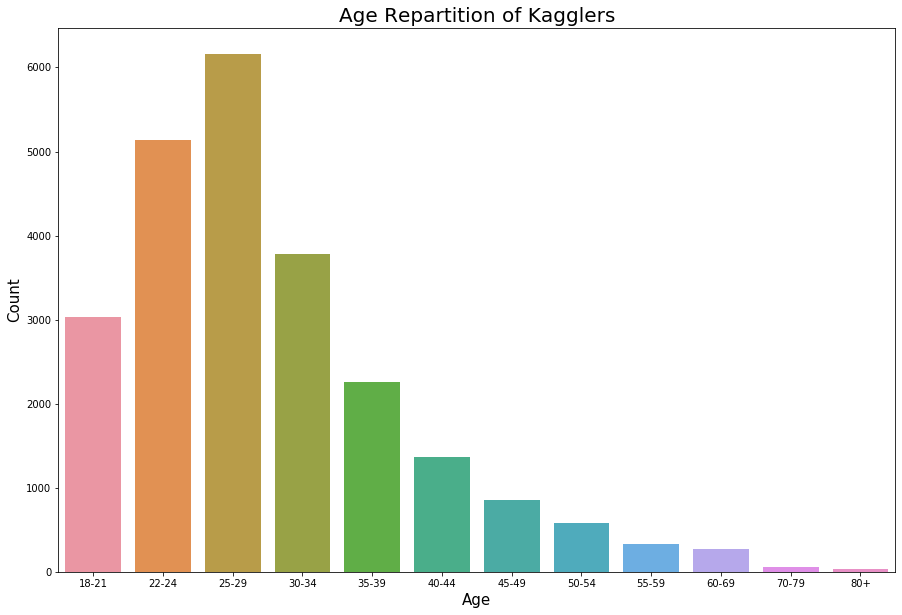

In [12]:
order = ['18-21', '22-24', '25-29', '30-34','35-39', '40-44', '45-49', '50-54', '55-59', '60-69', '70-79', '80+']
plt.figure(figsize=(15,10))
sns.countplot(Salaries['Q2'], order=order)
plt.xlabel("Age", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Age Repartition of Kagglers", fontsize=20)
plt.show()

C:\Users\nileena\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning:

Columns (120,121,122,123,124,125,126,127,128,129,130) have mixed types. Specify dtype option on import or set low_memory=False.



In [16]:

dic = {'0-10,000': 5000, '10-20,000': 15000, '20-30,000': 25000, '30-40,000': 35000, 
       '40-50,000': 45000, '50-60,000': 55000, '60-70,000': 65000, '70-80,000': 75000, 
       '80-90,000': 85000, '90-100,000': 95000, '100-125,000': 112500, 
       '125-150,000': 137500, '150-200,000': 175000, '200-250,000': 225000, 
       '250-300,000': 275000, '300-400,000': 350000, '400-500,000': 450000, 
       '500,000+':500000}

 
Salaries_refined_3 = Salaries_refined_3.drop(Salaries_refined_3.index[0])
Salaries_refined_3['target'] = Salaries_refined_3['Q9'].apply(lambda x: dic[x])

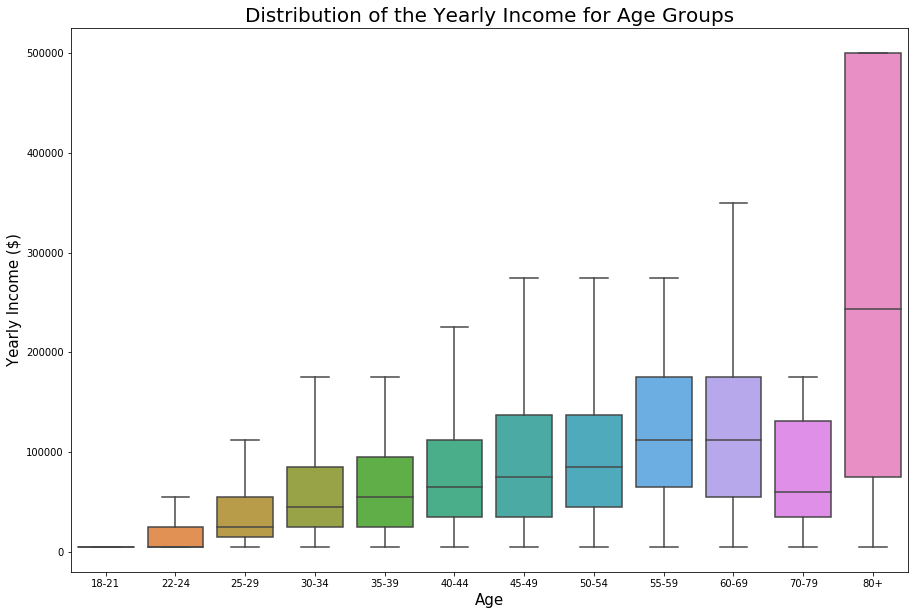

In [17]:
plt.figure(figsize=(15,10))
sns.boxplot(x='Q2', y='target', data=Salaries_refined_3
        , order=order, showfliers=False)
plt.ylabel("Yearly Income ($)", fontsize=15)
plt.xlabel("Age", fontsize=15)
plt.title("Distribution of the Yearly Income for Age Groups", fontsize=20)
plt.show()

### Inference 
*From the age distribution it is clear that more number of participants are in between 20-40 age gap. From the below graph it is clear that the older you are, the more you earn. Until you retire. Therefore the distribution is understandable.*

# 3 Feature Importance and Selection
*Feature engineering is the process of using knowledge of the data to create features that make machine learning algorithms work and produce better outputs. If feature engineering is done correctly, it increases the predictive power of machine learning algorithms by creating features from raw data that help facilitate the machine learning process.
Here's what feature engineering helps with :*

*1. Preparing the proper input dataset, compatible with the machine learning algorithm requirements.*   
*2. Improving the performance of machine learning models.*

### 3.1 RandomForest Regressor used for feature importance

In [89]:
X = one_hot
y = Salaries_refined_4['Salary']

### 3.2 Lets take a look at features in the order of their importance

In [90]:
rf = RandomForestRegressor()
rf.fit(X, y) 
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

feature_importances.head()

importance
Country of Residence_United States of America    0.223477
Job Title_Student                                0.148131
Age_22-24                                        0.041044
Age_25-29                                        0.031645
Age_18-21                                        0.025268

In [91]:
features_rf=list(feature_importances.index)


In [92]:
df_from_rf=one_hot[features_rf]
df_from_rf.head()

Country of Residence_United States of America  Job Title_Student  \
1                                              0                  0   
2                                              1                  0   
3                                              0                  0   
4                                              0                  0   
5                                              0                  0   

   Age_22-24  Age_25-29  Age_18-21  Country of Residence_India  \
1          0          0          0                           0   
2          0          0          0                           0   
3          1          0          0                           1   
4          0          0          0                           0   
5          0          0          1                           1   

   Job Title_Research Assistant  Industry/Field_Academics/Education  \
1                             0                                   0   
2                             0                                   0   
3                             0                                   0   
4                             0                                   1   
5                             0                                   0   

   Country of Residence_Australia  Country of Residence_Canada  ...  \
1                               0                            0  ...   
2                               0                            0  ...   
3                               0                            0  ...   
4                               0                            0  ...   
5                               0                            0  ...   

   Years of experience of coding to analyze data?_I have never written code and I do not want to learn  \
1                                                  0                                                     
2                                                  0                                                     
3                                                  0                                                     
4                                                  0                                                     
5                                                  0                                                     

   Online platform - Selected Choice?_TheSchool.AI  ML Library_Mxnet  \
1                                                0                 0   
2                                                0                 0   
3                                                0                 0   
4                                                0                 0   
5                                                0                 0   

   Country of Residence_Peru  Data Visualisation Library_Altair  \
1                          0                                  0   
2                          0                                  0   
3                          0                                  0   
4                          0                                  0   
5                          0                                  0   

   Data Visualisation Library_Geoplotlib  \
1                                      0   
2                                      0   
3                                      0   
4                                      0   
5                                      0   

   Recommended Programming Language_VBA  ML Library_CNTK  \
1                                     0                0   
2                                     0                0   
3                                     0                0   
4                                     0                0   
5                                     0                0   

   Recommended Programming Language_Go  Job Title_Data Journalist  
1                                    0                          0  
2                                    0                          0  
3                     

### 3.3  Plotting 253 features against its importance

In [93]:
font = {'family': 'monospace',
        'color':  'black',
        'weight': 'normal',
        'size': 70,
        }

features = X.columns
importances = rf.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(100,200))
plt.title('Feature Importances - Salary', fontdict = font)
plt.barh(indices, importances[indices], align='center', color = 'blue')
plt.yticks(indices, [features[i] for i in indices],fontsize=30)
plt.xlabel('Relative Importance',fontsize=30)
plt.show()

### 3.4 Plotting the 40 most important features

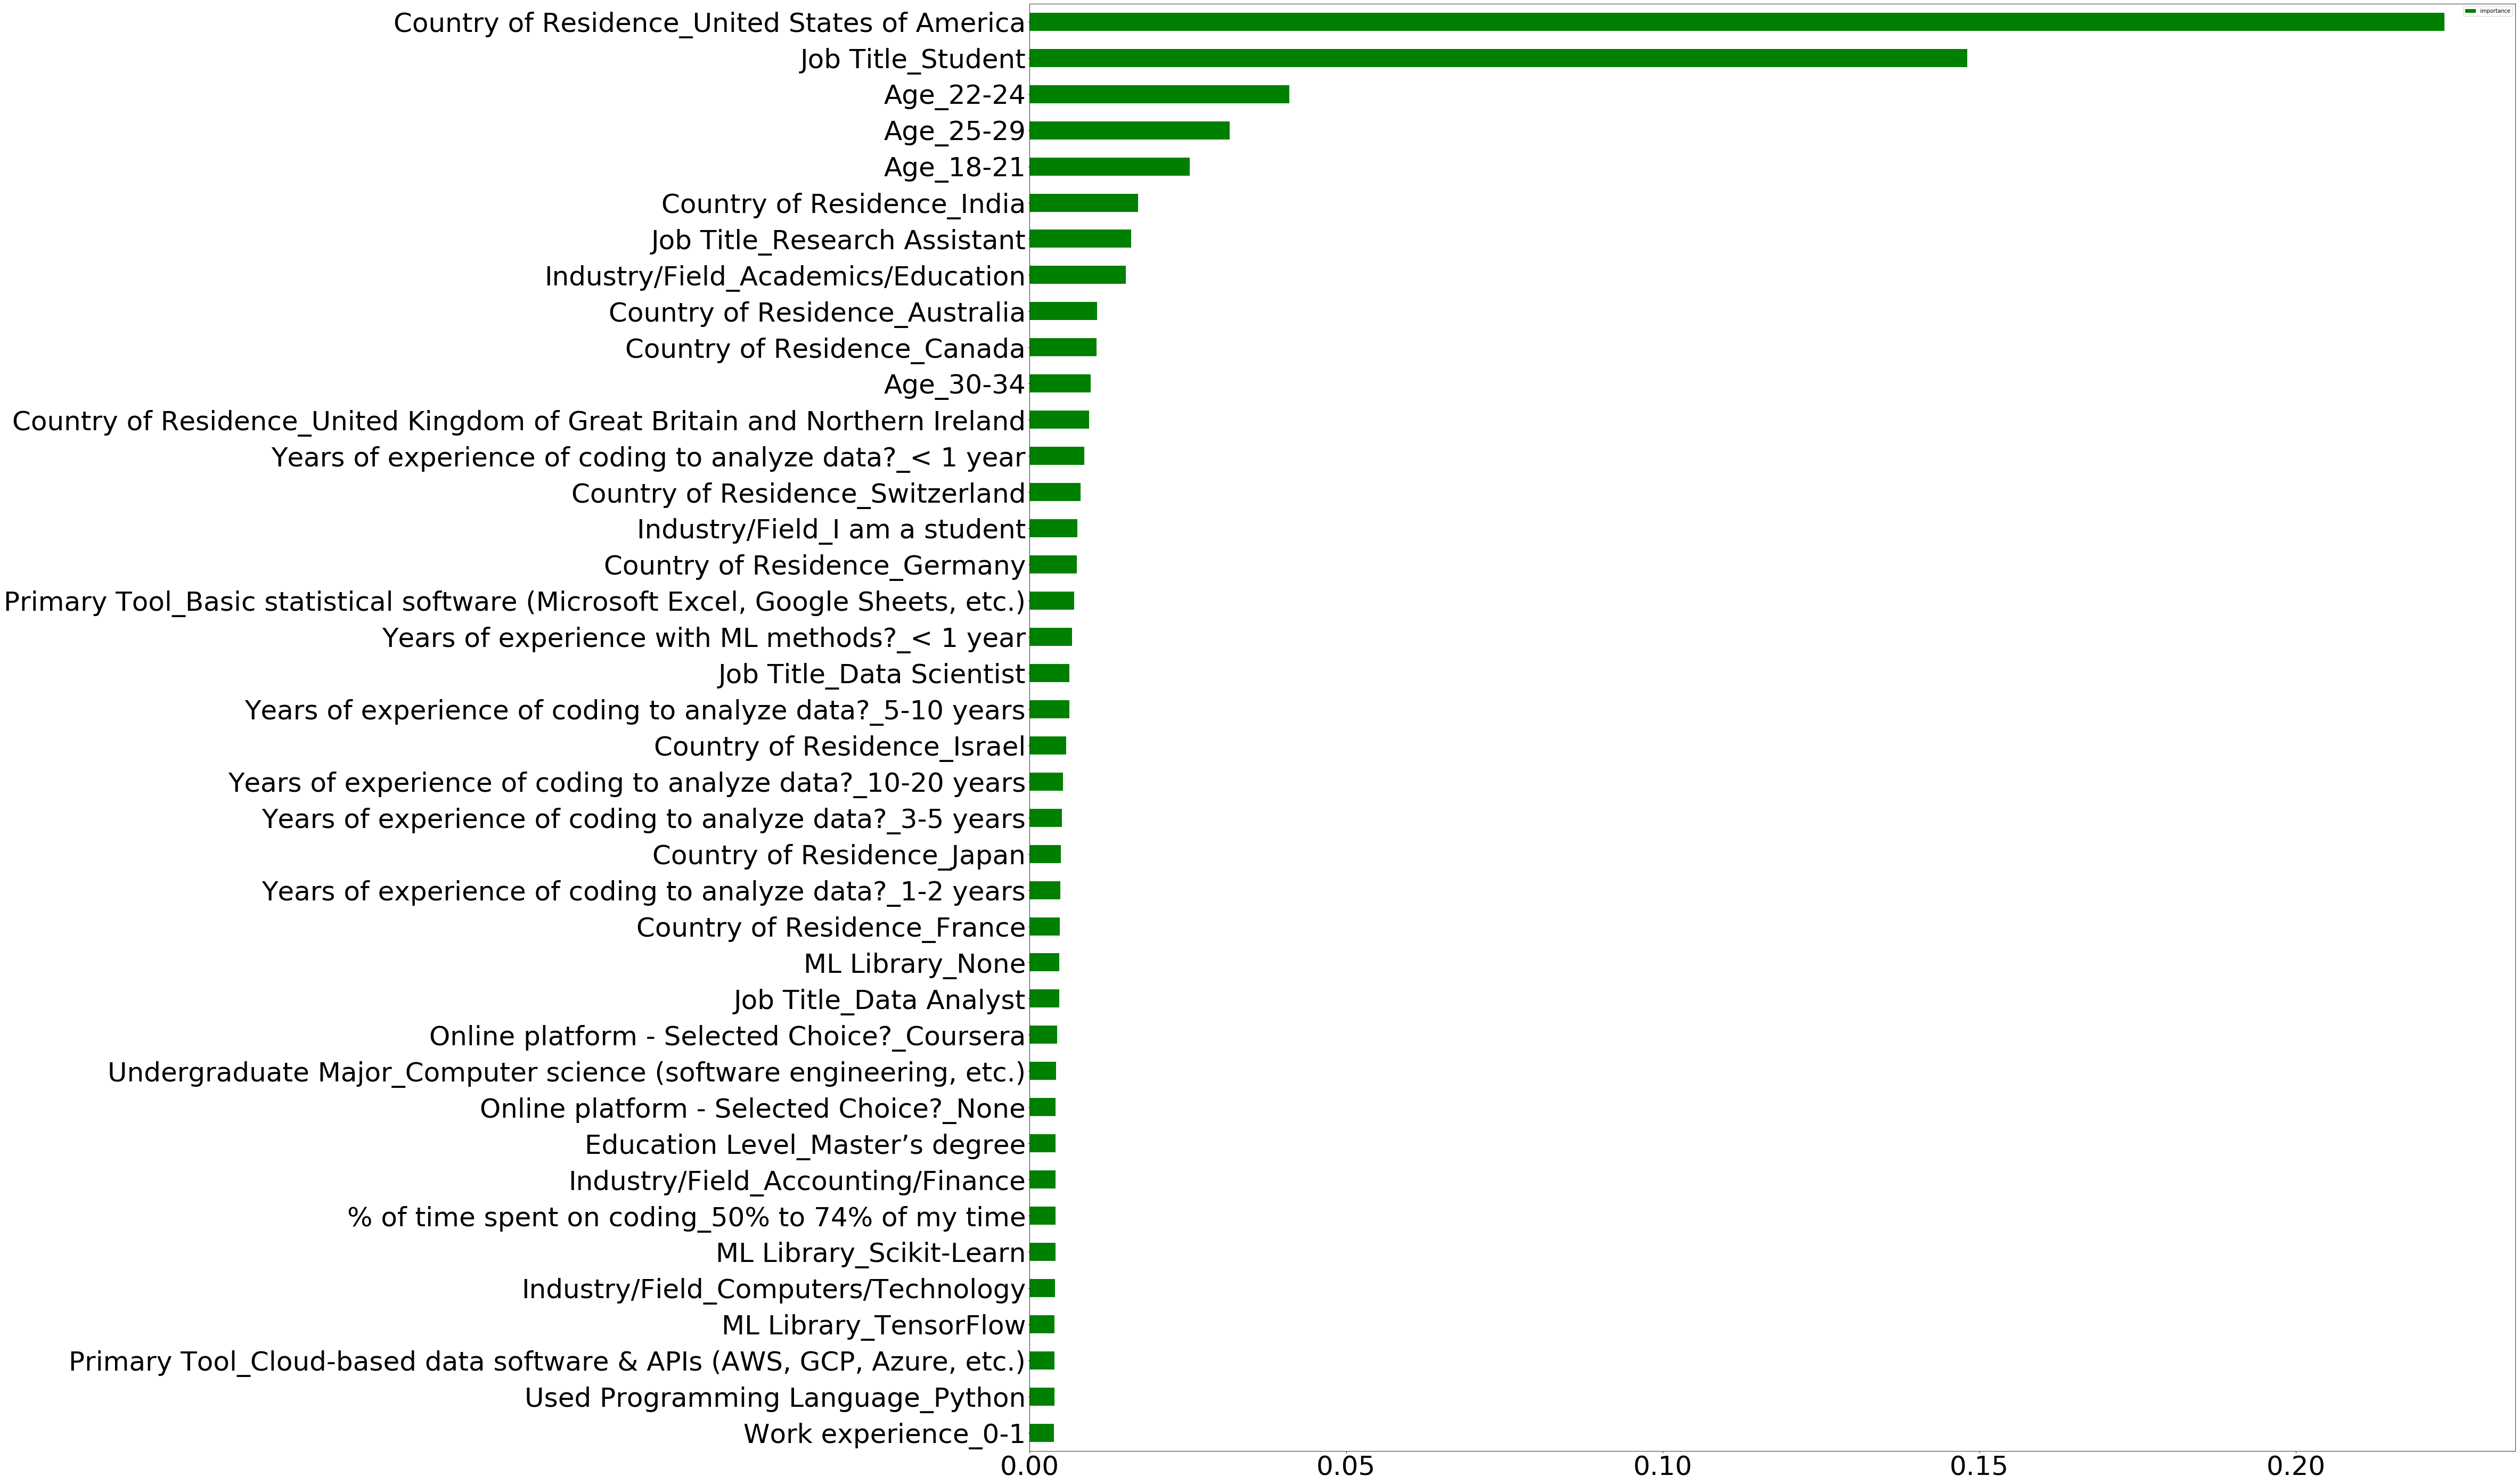

In [94]:
ax=feature_importances.head(40).plot(kind='barh',figsize=(50,50),fontsize=50,y='importance',color='green')
ax.invert_yaxis()

### What can we infer?
*On using random forest selection algorithm, I plotted the top 40 important features as shown above*
    
*USA : Most of the survey respondents were from US and this looks like a very important feature. Data scientists from US are most likely to br paid higher than other countries.*
    
*Job Title: From the above plot, being a student and research assistant*


### 3.5 Feature Selection with PCA as the number of features are very high

### What is PCA?
*Principal component analysis (PCA) is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables (entities each of which takes on various numerical values) into a set of values of linearly uncorrelated variables called principal components. This transformation is defined in such a way that the first principal component has the largest possible variance (that is, accounts for as much of the variability in the data as possible), and each succeeding component in turn has the highest variance possible under the constraint that it is orthogonal to the preceding components.*

### Why PCA here?
*As seen from the above analysis the number of features is too high which will skew our results therefore it is 
imperative that dimentionality reduction is performed.*

In [95]:
X_train, X_test, y_train, y_test = train_test_split(one_hot,y,test_size=0.2)

In [96]:

model_lr = linear_model.LinearRegression()

pca = PCA(n_components=.95)
pca.fit(X)
PCA_X = pca.transform(X)
PCA_X_test = pca.transform(X_test)
model_lr_pca = linear_model.LinearRegression()
model_lr_pca.fit(PCA_X,y)

predictions_pca_train = model_lr_pca.predict(PCA_X)
predictions_pca_test = model_lr_pca.predict(PCA_X_test)

print ("Train r2 Score")

print (r2_score(y, predictions_pca_train))  

print ("Test r2 Score")

print (r2_score(y_test,predictions_pca_test))

Train r2 Score
0.6183557462094771
Test r2 Score
0.6223805906158055


### 3.6 The features dataframe is fit on the PCA . PCA transformation is performed and the r2 scores of the train and test datas are checked. It seems that the train and test data have good correlation therefore reducing our number of features.

In [97]:
df_pca = pd.DataFrame(data=PCA_X)

In [98]:
df_pca.shape

(13415, 128)

In [99]:
df_pca.head()

0         1         2         3         4         5         6    \
0  1.580424  1.188601 -1.279884 -0.010043 -0.141027  0.890655  0.366215   
1  0.727575 -0.315890  0.734008 -0.114628  0.426186 -0.819135  0.080553   
2  1.162832 -0.206265  0.677224  0.209405  0.126402 -0.216689 -0.297530   
3  1.885879  0.663997 -0.271588 -0.821506  0.304711  0.146422 -0.660578   
4 -0.664387  0.672536  0.497793 -0.153018  0.861639 -0.473735 -0.251513   

        7         8         9    ...       118       119       120       121  \
0  0.376780 -0.530048 -0.002169  ... -0.057163  0.032390  0.007062 -0.043773   
1 -0.513470  0.850115 -1.160887  ... -0.018825 -0.128657  0.011461  0.007699   
2 -0.329709 -0.038058 -0.021050  ...  0.041627 -0.231268 -0.275551 -0.377348   
3 -0.370862  0.049076  0.150681  ... -0.044514 -0.009458  0.068607  0.060576   
4 -0.413990 -0.569339  0.191380  ... -0.054176 -0.016232  0.006351  0.020292   

        122       123       124       125       126       127  
0 -0.004557  0.064925  0.041208 -0.016480  0.156981  0.045740  
1 -0.053730  0.008543  0.002517 -0.052704 -0.067601 -0.007667  
2 -0.535630  0.218678  0.104668 -0.172040 -0.317285 -0.058125  
3  0.030070 -0.072213  0.010494  0.015417  0.086363  0.006313  
4 -0.041402 -0.006589  0.033965  0.012865  0.026981  0.043406  

[5 rows x 128 columns]

# 4. Model Implementation

### For the model implementation , we have chosen to implement Logistic Regression
*Logistic Regression : Logistic regression is the appropriate regression analysis to conduct when the dependent variable is dichotomous (binary).  Like all regression analyses, the logistic regression is a predictive analysis.  Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables*


## Logistic Regression

In [103]:
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
X_train, X_test, y_train, y_test = train_test_split(df_pca, y, test_size = 0.2, random_state = 101)

### *Let's see how the accuracy unfolds for each of the 10 folds, average accuracy, average precision and average error*

In [104]:
from sklearn.metrics import accuracy_score, log_loss, precision_score

 

X= df_pca   #getting the final dataframe 
kfold = KFold(n_splits=10)   #defining the 10 folds
kfold.get_n_splits(X)

 

accuracy = np.zeros(10)
precision = np.zeros(10)
error_test = np.zeros(10)
error_train = np.zeros(10)
np_idx = 0

 

# iterating through each fold
for train_idx, test_idx in kfold.split(X):
    xtrain, xtest = X.values[train_idx], X.values[test_idx]   #getting the train and test data based on indices
    ytrain, ytest = y.values[train_idx], y.values[test_idx]
    sc_x = StandardScaler() 
    xtrain = sc_x.fit_transform(xtrain)  
    xtest = sc_x.transform(xtest)
    classifier = LogisticRegression(random_state = 0) 
    classifier.fit(xtrain, ytrain)
    y_test_pred = classifier.predict(xtest)
    y_train_pred = classifier.predict(xtrain)
    predtest = classifier.predict_proba(xtest)
    predtrain = classifier.predict_proba(xtrain)
    ERR_train = log_loss(ytrain,predtrain )
    ERR_test = log_loss(ytest, predtest)
    ACC = accuracy_score(ytest, y_test_pred)
    PRC = precision_score(ytest , y_test_pred, average ='macro')
    # calculating the accuracy,precision and error on the dataset for each folds
    accuracy[np_idx] = ACC*100
    precision[np_idx] = PRC*100
    error_test[np_idx] = ERR_test
    error_train[np_idx] = ERR_train
    np_idx += 1
    print ("Fold {}: Accuracy: {}%  Precision: {}%  Error: {}".format(np_idx,\
                                    round(ACC*100,3), round(PRC*100,3), round(ERR_test,3)))   

 

#finding the means of accuracy, precision and test_error
print ("Average Accuracy: {}%({}%)".format(round(np.mean(accuracy),3),round(np.std(accuracy),3)))
print ("Average Precision: {}%({}%)".format(round(np.mean(precision),3),round(np.std(precision),3)))
print ("Average Error: {}%({}%)".format(round(np.mean(error_test),3),round(np.std(error_test),3)))

Fold 1: Accuracy: 55.067%  Precision: 36.387%  Error: 1.163
Fold 2: Accuracy: 46.572%  Precision: 34.407%  Error: 1.366
Fold 3: Accuracy: 47.914%  Precision: 41.655%  Error: 1.379
Fold 4: Accuracy: 44.039%  Precision: 40.06%  Error: 1.363
Fold 5: Accuracy: 53.502%  Precision: 49.463%  Error: 1.22
Fold 6: Accuracy: 49.515%  Precision: 45.874%  Error: 1.337
Fold 7: Accuracy: 45.488%  Precision: 40.711%  Error: 1.383
Fold 8: Accuracy: 48.62%  Precision: 36.971%  Error: 1.316
Fold 9: Accuracy: 48.322%  Precision: 33.321%  Error: 1.337
Fold 10: Accuracy: 48.546%  Precision: 37.092%  Error: 1.279
Average Accuracy: 48.759%(3.187%)
Average Precision: 39.594%(4.819%)
Average Error: 1.314%(0.069%)


### *Lets see the accuracy and precision of test and train*

In [105]:
model_lr = linear_model.LogisticRegression(multi_class='ovr')
X_train, X_test, y_train, y_test = train_test_split(df_pca,y, test_size = 0.3, random_state = 9)
sc_x = StandardScaler() 
xtrain = sc_x.fit_transform(X_train)  
xtest = sc_x.transform(X_test)
model_lr.fit(X_train, y_train)
    
predictions = model_lr.predict(X_test)

 

y_test_pred = classifier.predict(X_test)
y_train_pred = classifier.predict(X_train)
predtest = classifier.predict_proba(X_test)
predtrain = classifier.predict_proba(X_train)

 

#finding the accuracy, precision and test_error
accuracy_test = accuracy_score(y_test, y_test_pred)
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_test = precision_score(y_test , y_test_pred, average ='macro')
precision_train = precision_score(y_train , y_train_pred, average ='macro')

 

print("Accuracy_test: {}%".format(round(np.mean(accuracy_test),3)))
print("Accuracy_train: {}%".format(round(np.mean(accuracy_train),3))) 
print("precision_test: {}%".format(round(np.mean(precision_test),3)))
print("precision_train: {}%".format(round(np.mean(precision_train),3)))    

Accuracy_test: 0.466%
Accuracy_train: 0.459%
precision_test: 0.334%
precision_train: 0.336%


C:\Users\nileena\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples.



In [106]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1,\
                        train_sizes=np.linspace(.1, 1.0, 5), scoring='accuracy'):
    
    plt.figure(figsize=(10,6))
    plt.title(title)
    
    if ylim is not None:
        plt.ylim(*ylim)
        
    plt.xlabel("Training examples")
    plt.ylabel(scoring)
    
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, scoring=scoring, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,\
                     train_scores_mean + train_scores_std, alpha=0.1, \
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,\
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    
    return plt

### Learning Curve

*A learning curve is a plot of model learning performance over experience or time. Learning curves are a widely used diagnostic tool in machine learning for algorithms that learn from a training dataset incrementally.*

<module 'matplotlib.pyplot' from 'C:\\Users\\nileena\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

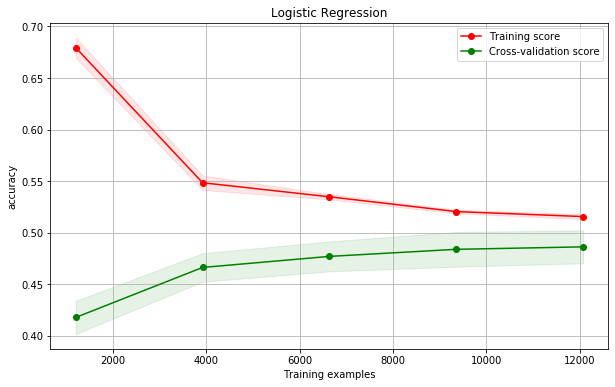

In [107]:
plot_learning_curve(model_lr,'Logistic Regression', X, y, cv=10)

## Inference
*1.I have used logistic regression to implement my model.*

*2.Average accuracy of my model  is close to 49 %*

*3.The green line in the learning curve interprets the same with accuracy varying between 42% to 52% over the 10 folds*

*4.With increase in training examples, the graph says that the training score and cross validation score gets closer*

# 5. Hyperparameter Tuning

#### Importance of the right set of hyperparameter values in a machine learning model:
*The best way to think about hyperparameters is like the settings of an algorithm that can be adjusted to 
optimize performance, just as you might turn the knobs of an AM radio to get a clear signal*
#### Grid searching of hyperparameters:
*Grid search is an approach to hyperparameter tuning that will methodically build and evaluate a 
model for each combination of algorithm parameters specified in a grid*

In [108]:
import time
penalty = ['l1', 'l2']
C = [0.01, 0.1, 1, 10, 100, 1000]
class_weight = [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}]
solver = ['liblinear', 'saga']
param_grid = dict(penalty=penalty,
                  C=C,
                  class_weight=class_weight,
                  solver=solver)
grid = GridSearchCV(estimator=model_lr,
                    param_grid=param_grid,
                    cv=10,
                    verbose=1,
                    n_jobs=-1,
                    scoring= 'accuracy',
                    return_train_score=True
                
                   )
start_time = time.time()
grid_result = grid.fit(df_pca.values, y)


Fitting 10 folds for each of 96 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   35.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 18.9min
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed: 24.3min finished


In [109]:
grid_results_df= pd.DataFrame(grid_result.cv_results_) # convert to DF

In [110]:
grid_results_df.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.835284      0.071514         0.003595        0.002796    0.01   
1       5.647259      0.508216         0.001598        0.001957    0.01   
2       2.416419      0.349267         0.003196        0.003913    0.01   
3       4.498437      0.235060         0.001598        0.001957    0.01   
4       0.698666      0.029757         0.001198        0.001831    0.01   

  param_class_weight param_penalty param_solver  \
0   {1: 0.5, 0: 0.5}            l1    liblinear   
1   {1: 0.5, 0: 0.5}            l1         saga   
2   {1: 0.5, 0: 0.5}            l2    liblinear   
3   {1: 0.5, 0: 0.5}            l2         saga   
4   {1: 0.4, 0: 0.6}            l1    liblinear   

                                              params  split0_test_score  ...  \
0  {'C': 0.01, 'class_weight': {1: 0.5, 0: 0.5}, ...           0.396283  ...   
1  {'C': 0.01, 'class_weight': {1: 0.5, 0: 0.5}, ...           0.400743  ...   
2  {'C': 0.01, 'class_weight': {1: 0.5, 0: 0.5}, ...           0.495167  ...   
3  {'C': 0.01, 'class_weight': {1: 0.5, 0: 0.5}, ...           0.482528  ...   
4  {'C': 0.01, 'class_weight': {1: 0.4, 0: 0.6}, ...           0.397026  ...   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.393937            0.389464            0.388222   
1            0.385820            0.385571            0.383583   
2            0.480080            0.482067            0.476766   
3            0.463348            0.467489            0.460118   
4            0.391452            0.388222            0.386648   

   split5_train_score  split6_train_score  split7_train_score  \
0            0.388521            0.391751            0.390062   
1            0.385788            0.387858            0.384348   
2            0.476064            0.482442            0.476770   
3            0.463807            0.468196            0.464513   
4            0.388438            0.390012            0.388986   

   split8_train_score  split9_train_score  mean_train_score  std_train_score  
0            0.391852            0.391852          0.390375         0.001774  
1            0.385393            0.390692          0.385646         0.002141  
2            0.479629            0.481699          0.479107         0.002271  
3            0.466214            0.470189          0.464869         0.002950  
4            0.390858            0.389450          0.389042         0.001389  

[5 rows x 34 columns]

In [111]:
print('best estimator is ',grid.best_estimator_)
print("Best Accuracy after Grid search " ,round(grid.best_score_,2))
print("mean Variance after Grid search " ,round(grid.cv_results_['std_test_score'].mean()*100,2),'%')

best estimator is  LogisticRegression(C=0.1, class_weight={0: 0.4, 1: 0.6}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
Best Accuracy after Grid search  0.48
mean Variance after Grid search  2.08 %


### *As you can see above, the best parameters for an optimal model in this case is at C=0.1*
### *Lets verify the same by analysing bias-variance trend curve*

## Bias Variance Tradeoff

### What is bias?
*Bias is the difference between the average prediction of our model and the correct value which we are trying to predict. Model with high bias pays very little attention to the training data and oversimplifies the model. It always leads to high error on training and test data.*
    
### What is variance?
*Variance is the variability of model prediction for a given data point or a value which tells us spread of our data. Model with high variance pays a lot of attention to training data and does not generalize on the data which it hasn’t seen before. As a result, such models perform very well on training data but has high error rates on test data.*
 
### Why Bias Variance Tradeoff?
*If our model is too simple and has very few parameters then it may have high bias and low variance. On the other hand if our model has large number of parameters then it’s going to have high variance and low bias. So we need to find the right/good balance without overfitting and underfitting the data.*

In [117]:
def bias_compute(y_predictions, y_test):
    y_predictions = np.array(y_predictions)
    y_test = np.array(y_test)
    avg1 = np.average(y_test)
    avg2 = np.average(y_predictions)
    return np.power((avg1 - avg2),2)

In [118]:
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
X_train, X_test, y_train, y_test = train_test_split(df_pca, y, test_size = 0.2, random_state = 101)

In [119]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = StandardScaler()
kfold = KFold(n_splits=10)
kfold.get_n_splits(X)
bias_list = []
var_list = []
total = []
C_list=[0.01, 0.1, 1, 10, 100, 1000]

for C in C_list:    
    
    model = linear_model.LogisticRegression(C=C,penalty='l1',solver='liblinear')
    np_idx = 0
    y_test_predictions=[]
    variance=[]
    bias=[]
    MSE=[]
    y_true = []

    for train_index, test_index in kfold.split(X):
        X_train, X_test = X.values[train_index], X.values[test_index]
        y_train, y_test = y.values[train_index], y.values[test_index]
        
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.fit_transform(X_test)
        
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        bias.append(bias_compute(predictions,y_test))
        variance.append(((predictions-y_test.mean())**2).mean())
        MSE.append(np.sum((predictions-y_test)**2)/len(y_test))
              
    bias_list = np.append(bias_list, np.average(bias))
    var_list = np.append(var_list, np.average(variance))
    total=np.append(total,np.average(MSE))
        

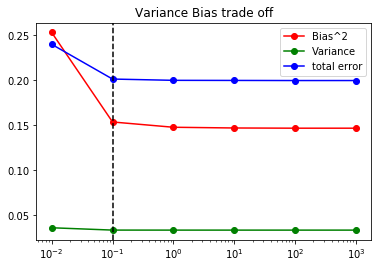

In [120]:
plt.plot(C_list, bias_list, 'o-', color="r",label="Bias^2")
#To better visualize variance(SE of coefs), we add a scaler .01 
plt.plot(C_list, var_list*0.01, 'o-', color="g", label="Variance")
plt.plot(C_list, total*0.1, 'o-', color="b", label="total error")
plt.semilogx()
plt.legend(loc="best")
plt.title("Variance Bias trade off")
plt.axvline(x=0.1,linestyle="--", color='black')
plt.show()

### *We need to look for low bias-low variance point. This assures a balanced model without overfitting or underfitting the data. From the previous step of hyperparameter tuning we concluded that optimal model occurs at C=0.1. We are focussing on C value as that's the most significant parameter for logisitic regression.This is verified by bias-variance trend curve seen above. Note that the low bias-low variance point occurs at the same c value of 0.1 in the plot above* 

# 6. Testing and Discussion

## Let's perform TESTING 

In [121]:
import itertools
from sklearn.metrics import make_scorer, confusion_matrix 
    

model_lr = linear_model.LogisticRegression(C=0.1, class_weight={0: 0.4, 1: 0.6})
X_train, X_test, y_train, y_test = train_test_split(df_pca.values,y, test_size = 0.2, random_state = 9)
sc_x = StandardScaler() 
xtrain = sc_x.fit_transform(X_train)  
xtest = sc_x.transform(X_test)
model_lr.fit(df_pca, y)
    
predictions = model_lr.predict(X_test)

 

y_test_pred = model_lr.predict(X_test)
y_train_pred = model_lr.predict(X_train)
predtest = model_lr.predict_proba(X_test)
predtrain = model_lr.predict_proba(X_train)

 

#finding the accuracy, precision and test_error
accuracy_test = accuracy_score(y_test, y_test_pred)
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_test = precision_score(y_test , y_test_pred, average ='macro')
precision_train = precision_score(y_train , y_train_pred, average ='macro')

 

print("Accuracy_test: {}%".format(round(np.mean(accuracy_test),3)))
print("Accuracy_train: {}%".format(round(np.mean(accuracy_train),3))) 
print("precision_test: {}%".format(round(np.mean(precision_test),3)))
print("precision_train: {}%".format(round(np.mean(precision_train),3)))    

Accuracy_test: 0.52%
Accuracy_train: 0.504%
precision_test: 0.474%
precision_train: 0.448%


### Lets plot the output in terms of probability of belonging to each of the salary buckets. I am doing it using Confusion matrix

In [122]:
def plot_confusion_matrix(cm, classes, title='Confusion matrix', normalize=False, cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    fmt = '.2f' if normalize else 'd'

 

    fig, ax = plt.subplots(figsize=(15, 10))
    ax.imshow(cm, interpolation='nearest', cmap=cmap)

 

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size=15)
    plt.colorbar()
    plt.grid(False)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

 

    thresh = (cm.max()+cm.min()) / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

 

    plt.tight_layout()
    plt.ylabel('True label', size=15)
    plt.xlabel('Predicted label', size=15)

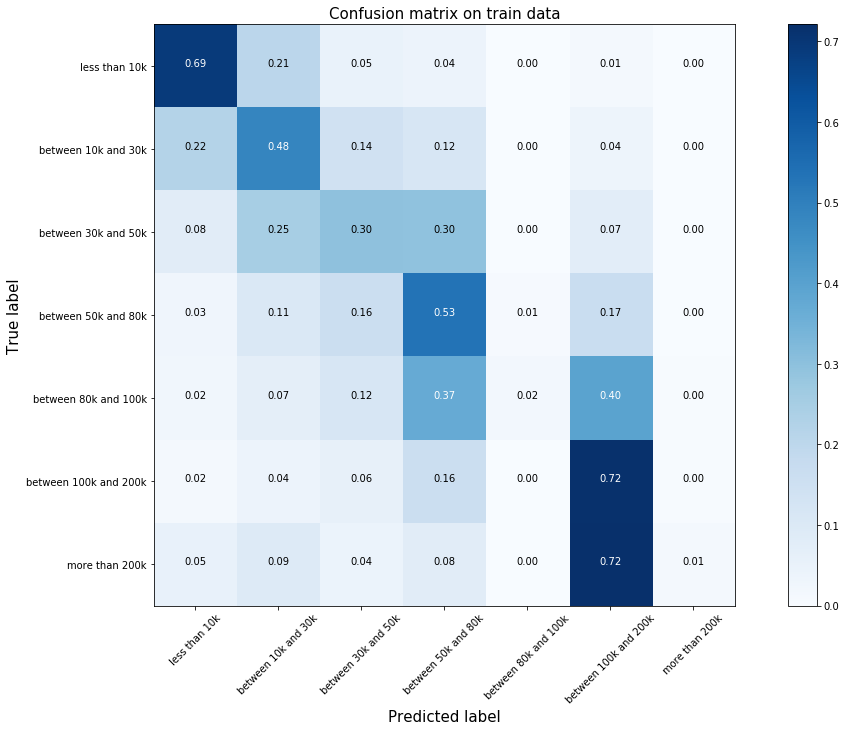

In [123]:
   
conf_mat_train = confusion_matrix(y_train,y_train_pred)
plot_confusion_matrix(conf_mat_train, classes, title='Confusion matrix on train data', normalize=True)
 


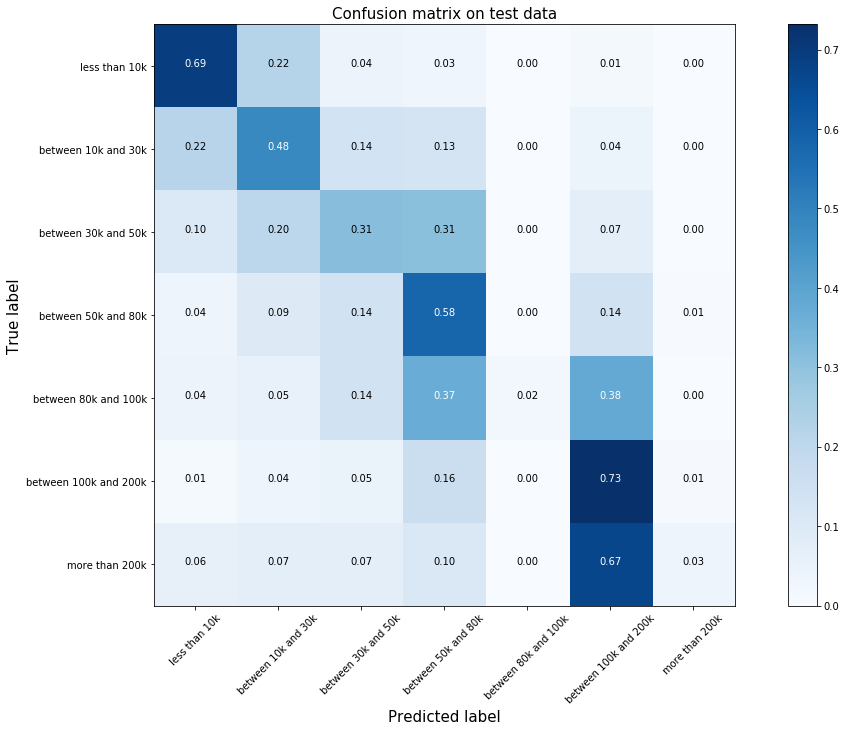

In [124]:
   
conf_mat_train = confusion_matrix(y_test,y_test_pred)
plot_confusion_matrix(conf_mat_train, classes, title='Confusion matrix on test data', normalize=True)
 

### Inference from Confusion Matrix
*1.As you can see - Prediction for less than 10k, between 100k-200k, more than 200k are better off than other categories. Probabilities for these buckets are much higher than the rest.*

*2.Between 10k-30k and 50k-80k shows moderately good probabilities of right predictions*

*3.30-50k and and 80-100k shows the least probabilties. This can be improved by widening each category with more data points.*

In [125]:
predictions = model.predict(xtest)
resultsDF = pd.read_csv('Kaggle_Salary_clean.csv')
resultsDF = resultsDF.drop(resultsDF.index[0])
dic_target = {'0-10,000': 0, '10-20,000': 1, '20-30,000': 1, '30-40,000': 2, 
       '40-50,000': 2, '50-60,000': 3, '60-70,000': 3, '70-80,000': 3, 
       '80-90,000': 4, '90-100,000': 4, '100-125,000': 4, 
       '125-150,000': 5, '150-200,000': 5, '200-250,000': 5, 
       '250-300,000': 5, '300-400,000': 5, '400-500,000': 5, 
       '500,000+':5}
 

resultsDF['Q9_target'] = resultsDF['Q9'].apply(lambda x: dic_target[x])
resultsDF = resultsDF.drop(columns='Q9', axis=1)

 

resultsDF['Q9_pred'] = pd.Series(predictions)
resultsDF[['Q9_target', 'Q9_pred']].head(30)

C:\Users\nileena\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning:

Columns (1,3,9,11,22,24,25,26,27,28,29,45,57,65,84,86,88,108,110,124,126,151,195,209,224,250,263,265,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,305,307,323,326,327,330,342,372,385,386,394,395) have mixed types. Specify dtype option on import or set low_memory=False.



Q9_target  Q9_pred
1           1      1.0
2           0      1.0
3           0      5.0
4           1      1.0
5           0      3.0
6           1      1.0
7           5      5.0
8           2      1.0
9           2      1.0
10          1      0.0
11          2      5.0
12          3      3.0
13          0      0.0
14          4      3.0
15          2      2.0
16          3      3.0
17          4      3.0
18          0      1.0
19          3      3.0
20          0      3.0
21          0      0.0
22          4      5.0
23          1      3.0
24          1      1.0
25          3      1.0
26          4      3.0
27          3      3.0
28          4      1.0
29          2      0.0
30          4      1.0

### The above results validate that predicted values are close to 50% accuracy

## Discussion on overall fit of model

### *Let's first understand how to intepret underfitting and overfitting from bias and variance*

### Underfitting
➤Underfitting happens when a model unable to capture the underlying pattern of the data. 

➤Usually have high bias and low variance

### Overfitting
➤Overfitting happens when a model captures the noise along with the underlying pattern in data. 

➤Usually have low bias and high variance. 


### *Analysing our graph of bias-variance in the previous section, note that the bias is higher and variance is lower. This clearly means that we are underfitting the data*

### *Also looking at our learning curve plotted in one of the previous sections, here's what we can intepret :*
*The relationship between the training and validation error, and the gap can be summarized this way: The bigger the difference between the two errors, the bigger the gap. The bigger the gap, the bigger the variance. In our case, the gap is very narrow, so we can safely conclude that the variance is low.*
### *This confirms that we are underfitting our data*

### To improve accuracy of our model , here are few things we can do :
#### 1. Add more data features
*More the number of features,better will be the model prediction and accuracy*

#### 2. Treat Outlier values
*There might be certain values in the survey responses which are clearly flawed or fake. Treating these outliers can help improve our model*

#### 3. Ensemble methods
*This technique simply combines the result of multiple weak models and produce better results. This can be achieved through many ways:Bagging (Bootstrap Aggregating) and BoostingIt is always a better idea to apply ensemble methods to improve the accuracy of your model. There are two good reasons for this:*

*a) They are generally more complex than traditional methods.* 

*b) The traditional methods give you a good base level from which you can improve and draw from to create your ensembles.*
